In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import savgol_filter

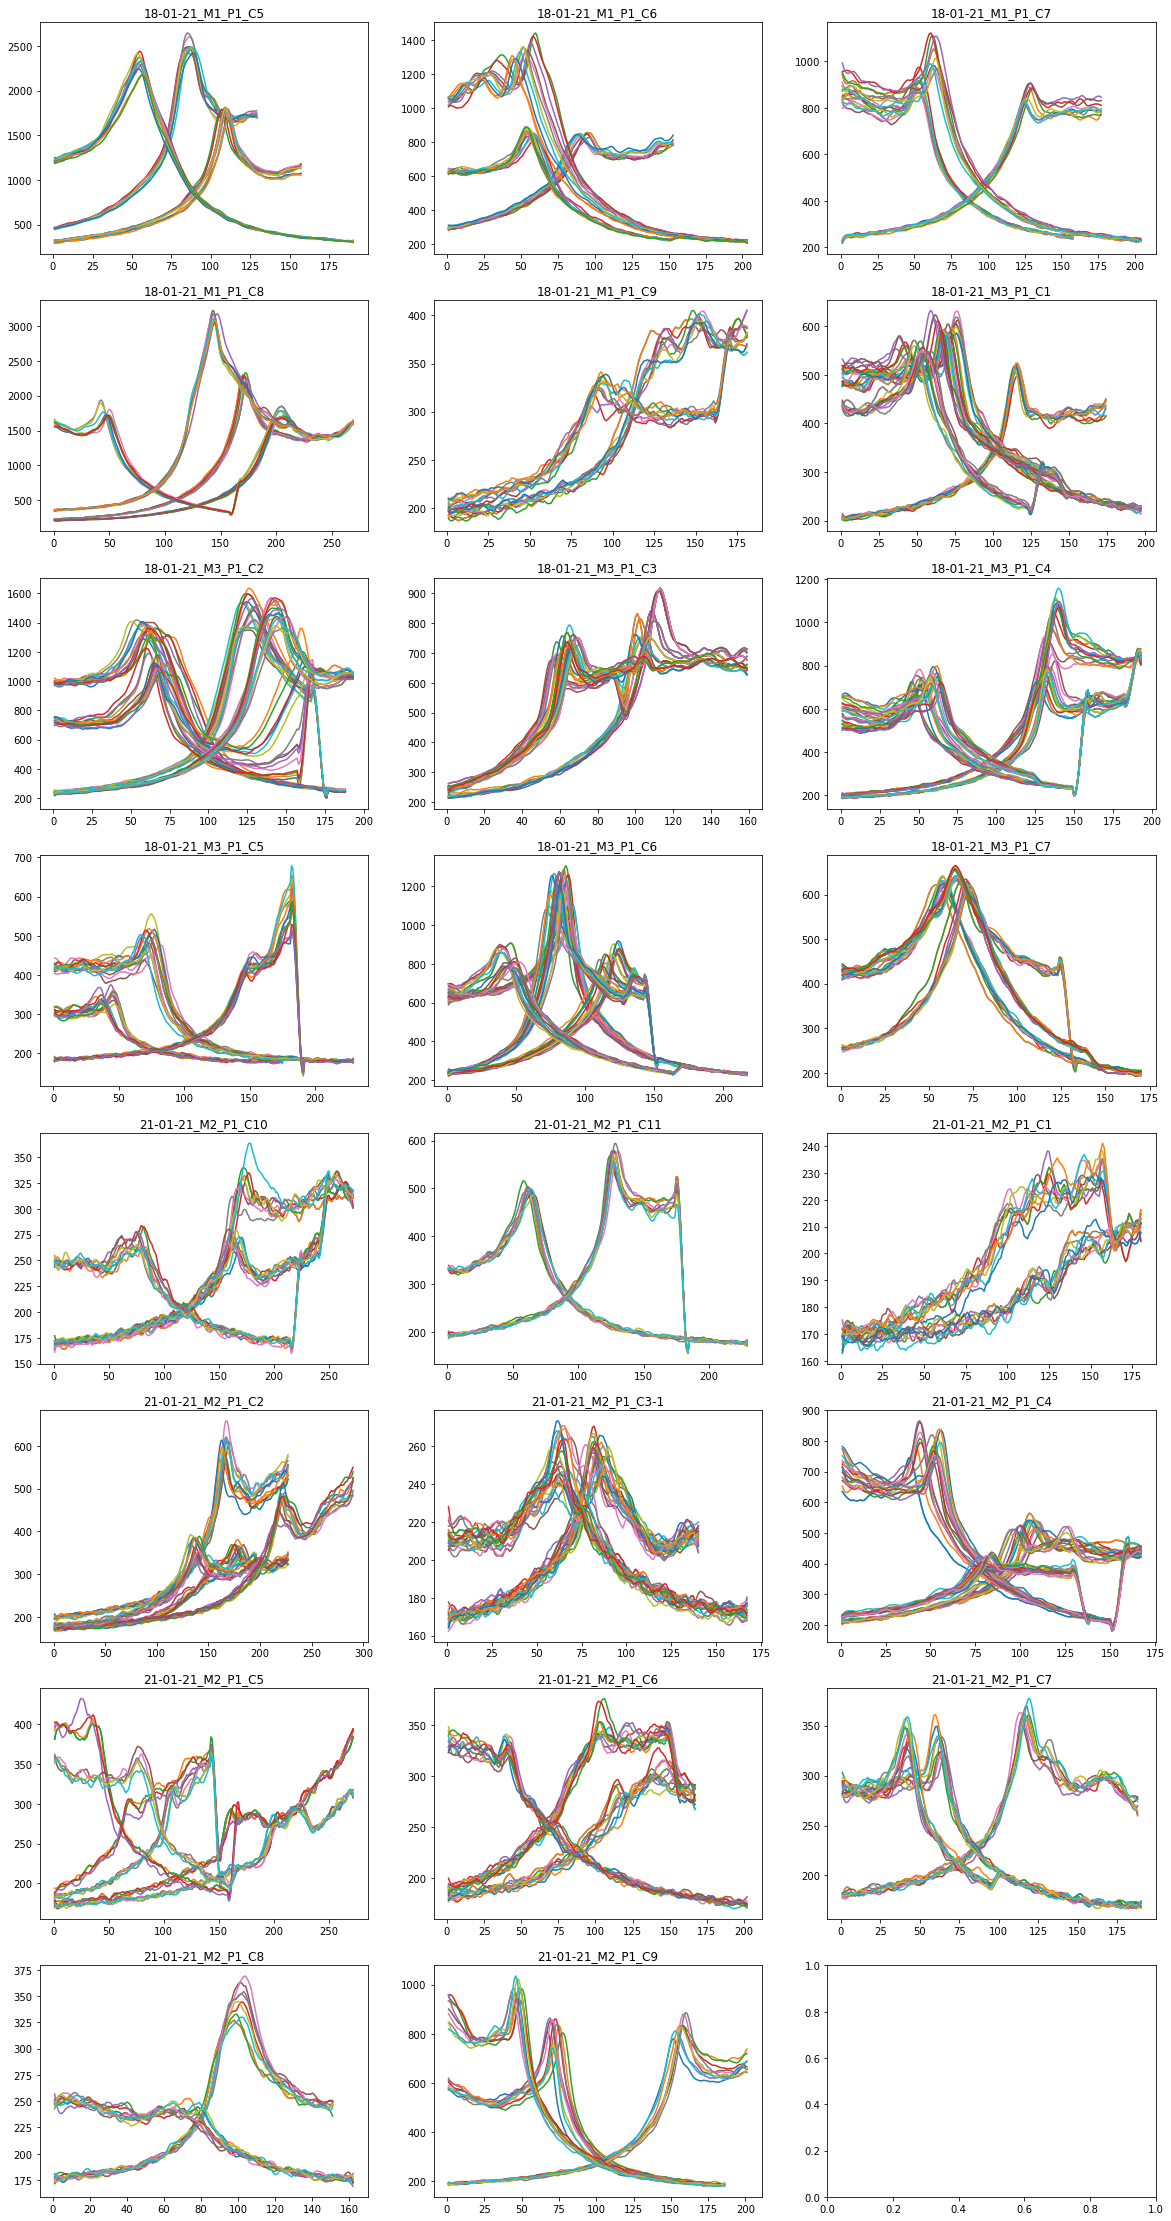

In [2]:
dirPath = "C://Users//JosephVermeil//Desktop//ActinCortexAnalysis//DataAnalysis//"
SubfilesPath = dirPath + "FluoQuantificationSubfiles//"
allFileNames = [f for f in os.listdir(SubfilesPath) if (os.path.isfile(os.path.join(SubfilesPath, f)) and f.endswith(".txt"))]
allCellsId = []
dataDict = {}
firstTry = True

for s in allFileNames:
    splitName = s.split('_')
    cellId = '' + splitName[0] + '_' + splitName[1] + '_' + splitName[2] + '_' + splitName[3]
    if cellId not in allCellsId:
        allCellsId.append(cellId)
        dataDict[cellId] = {}
        expType = ''
        for i in range(4, len(splitName)-2):
            expType += (splitName[i] + '_')
        expType = expType[:-1]
        dataDict[cellId]['expType'] = expType
        dataDict[cellId]['lineCount'] = 1
    else:
        dataDict[cellId]['lineCount'] += 1

        
cellCount = len(allCellsId)
nColsPlot = 3
nRowsPlot = (cellCount-1)//nColsPlot + 1
fig, ax = plt.subplots(nRowsPlot, nColsPlot, figsize = (20, 5*nRowsPlot))
plotCount = 0


for cellId in dataDict.keys():
    plotCount += 1
    filePathRoot = cellId + '_' + dataDict[cellId]['expType']
    nLine = dataDict[cellId]['lineCount']
    for iLine in range(1, nLine+1):
        currentFilePath = SubfilesPath + (filePathRoot + '_Line_' + str(iLine) + '.txt')
        currentFile = open(currentFilePath, 'r')
        lines = currentFile.readlines()
        N = len(lines) - 1;
        M = len(lines[0][:-2].split('\t')) - 1
        if not 'sliceCount' in dataDict[cellId].keys():
            dataDict[cellId]['sliceCount'] = M
        if not 'peakAmplitudeMatrix' in dataDict[cellId].keys():
            dataDict[cellId]['filteredMaxMatrix'] = np.zeros((nLine, M))
            dataDict[cellId]['filteredMaxPositionMatrix'] = np.zeros((nLine, M))
            dataDict[cellId]['backgroundIntensityMatrix'] = np.zeros((nLine, M))
            dataDict[cellId]['peakAmplitudeMatrix'] = np.zeros((nLine, M))
        currentLineLMatrixKey = ('lineMatrix' + str(iLine))
        dataDict[cellId][currentLineLMatrixKey] = np.zeros((N,M))
        for k in range(1, len(lines)):
            line = lines[k]
            splitLine = line[:-2].split('\t')
            floatLine = [float(x) for x in splitLine[1:]]
            dataDict[cellId][currentLineLMatrixKey][k-1,:] = np.array(floatLine)
        for j in range(M):
            profile = np.transpose(dataDict[cellId][currentLineLMatrixKey][:,j])
            filteredProfile = savgol_filter(profile, 11, 3)
            # Plot
            if nRowsPlot == 1:
                ax[(plotCount-1)%nColsPlot].plot(np.array([i for i in range(1,len(profile)+1)]), filteredProfile)
                ax[(plotCount-1)%nColsPlot].set_title(cellId)
            else:
                ax[(plotCount-1)//nColsPlot, (plotCount-1)%nColsPlot].plot(np.array([i for i in range(1,len(profile)+1)]), filteredProfile)
                ax[(plotCount-1)//nColsPlot, (plotCount-1)%nColsPlot].set_title(cellId)
            filteredMax, filteredMaxIndex = np.max(filteredProfile[10:-10]), np.argmax(filteredProfile[10:-10]) + 10
            dataDict[cellId]['filteredMaxMatrix'][iLine-1, j] = filteredMax
            dataDict[cellId]['filteredMaxPositionMatrix'][iLine-1, j] = filteredMaxIndex
            measureWindow = 20 # pixels
            fromInToOut = (np.mean(filteredProfile[:measureWindow]) > np.mean(filteredProfile[-measureWindow:]))
            backgroundIntensity = 0
            if fromInToOut:
                backgroundIntensity = np.mean(filteredProfile[-measureWindow:])
            else:
                backgroundIntensity = np.mean(filteredProfile[:measureWindow])
            dataDict[cellId]['backgroundIntensityMatrix'][iLine-1, j] = backgroundIntensity
            dataDict[cellId]['peakAmplitudeMatrix'][iLine-1, j] = filteredMax - backgroundIntensity
        currentFile.close()
    
    dataDict[cellId]['medianPeakAmplitude'] = np.median(dataDict[cellId]['peakAmplitudeMatrix']) 
    dataDict[cellId]['meanPeakAmplitude'] = np.mean(dataDict[cellId]['peakAmplitudeMatrix'])

In [3]:
shortDataDict = {}
for cellId in dataDict.keys():
    shortDataDict[cellId] = dataDict[cellId]['meanPeakAmplitude']
    
shortDataDict

{'18-01-21_M1_P1_C5': 1798.786253058564,
 '18-01-21_M1_P1_C6': 768.1929443985334,
 '18-01-21_M1_P1_C7': 686.7012033469331,
 '18-01-21_M1_P1_C8': 1655.5346203434647,
 '18-01-21_M1_P1_C9': 187.56004285071066,
 '18-01-21_M3_P1_C1': 343.50316994099785,
 '18-01-21_M3_P1_C2': 1016.0572902447589,
 '18-01-21_M3_P1_C3': 543.9514596922037,
 '18-01-21_M3_P1_C4': 436.39366947164115,
 '18-01-21_M3_P1_C5': 298.6030546762509,
 '18-01-21_M3_P1_C6': 775.311502034488,
 '18-01-21_M3_P1_C7': 432.0688204280584,
 '21-01-21_M2_P1_C10': 133.5276623271179,
 '21-01-21_M2_P1_C11': 358.30358620046746,
 '21-01-21_M2_P1_C1': 52.153266364696215,
 '21-01-21_M2_P1_C2': 273.33601352952707,
 '21-01-21_M2_P1_C3-1': 83.18677740649542,
 '21-01-21_M2_P1_C4': 312.1262177749164,
 '21-01-21_M2_P1_C5': 128.38604544289106,
 '21-01-21_M2_P1_C6': 148.4524488328807,
 '21-01-21_M2_P1_C7': 171.58344858585926,
 '21-01-21_M2_P1_C8': 120.56376187937117,
 '21-01-21_M2_P1_C9': 687.2698407381532}

In [6]:
saveFileName = 'FluoQuantification.csv'
saveFilePath = dirPath + saveFileName
saveFile = open(saveFilePath, 'w')
saveFile.write('cellID;meanFluoPeakAmplitude\n')
for cellId in shortDataDict.keys():
    saveFile.write(cellId + ';' + str(shortDataDict[cellId]) + '\n')
saveFile.close()
    